In [3]:
!pip install numpy-financial
import numpy_financial as npf

class Investimento(object):
    def __init__(self, taxa: float, fluxo_caixa: list[float], valor_futuro: float = 0.0):
        self.taxa = taxa
        self.fluxo_caixa = fluxo_caixa
        self.valor_futuro = valor_futuro

    def __calc_juro_composto__(self) -> float:
        juro_composto = (1 + self.taxa) ** len(self.fluxo_caixa) - 1
        return juro_composto

    def calc_vpl(self, incluir_valor_futuro: bool = False) -> float:
        vpl = npf.npv(self.taxa, self.fluxo_caixa)
        if(incluir_valor_futuro):
            vpl = self.conv_F_to_P() + vpl
        return round(vpl, 2)

    def conv_F_to_P(self) -> float:
        valor_presente = self.valor_futuro * \
            (1 / self.__calc_juro_composto__())
        return valor_presente
    
    def calc_tir(self) -> float:
        tir = npf.irr(values = self.fluxo_caixa)
        return round(tir * 100, 2)
    
    def calc_caue(self) -> float:
        caue = - npf.pmt(rate=self.taxa, nper=len(self.fluxo_caixa) - 1, pv = self.calc_vpl())
        return round(caue, 2) 

# TIR - Taxa Interna de Retorno

Taxa Interna de Retorno (TIR) permite que você encontre a remuneração do investimento em termos percentuais. Quando for calculada a TIR de determinado investimento e/ou financiamento, está sendo extraído dele o percentual de ganho que ele oferece ao investidor.

## Tomada de Decisão

Para decidir se um investimento é viável ou não ele deve possuir uma TIR maior que a TMA. O investimento de maior TIR deve ser o mais rentável.

### Exemplo 

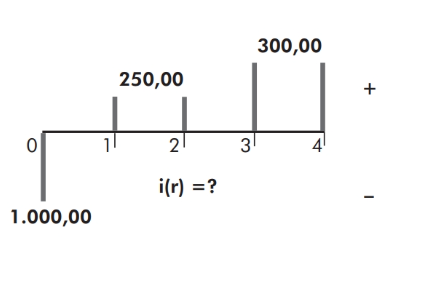

In [4]:

def comparar_invest_via_tir(inv_a: Investimento, inv_b: Investimento):

    # vpl investimento A
    A = inv_a.calc_tir()
    # vlp investimento B
    B = inv_b.calc_tir()

    print("Comparação de investimentos considerando TIR.")

    print("Investimento 1: ", A)
    print("Investimento 2: ", B)

    # avaliando qual investimento é melhor
    maior_tir = A if A > B else B
    print("Melhor investimento, considerando maior valor TIR é: ",
          str(maior_tir) + "%")

#####################################################################
######   Utilizando a função de avaliação de investimentos     ######
#####################################################################


# investimento 1
investimento1: Investimento = Investimento(
    taxa=0.0, fluxo_caixa=[-150, 73, 73, 73])

# investimento 2
investimento2: Investimento = Investimento(
    taxa=0.0, fluxo_caixa=[-130, 52, 52, 52])

comparar_invest_via_tir(investimento1, investimento2)


Comparação de investimentos considerando TIR.
Investimento 1:  21.6
Investimento 2:  9.7
Melhor investimento, considerando maior valor TIR é:  21.6%
